## IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn.preprocessing
import mglearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## PART 1: GROUND FLUX DATA

In [105]:
file = r'/Users/dalynmccauley/Documents/UI FALL18/STATS517/Final Project/DATA/ECL_data.csv'
data = pd.read_csv(file, converters= {'TIMESTAMP': pd.to_datetime})
data = data.fillna(data.mean())
TS = data['TIMESTAMP']
data['time'] = data['TIMESTAMP']
data = data.set_index(['TIMESTAMP'])

## drop unnecessary/redundent measurements
data = data.drop(['EC_LE', 'FWT_6m','Q7_Avg','IRDn_Avg', 'IRUp_Avg','NRTC_Avg', 'SRDn_Avg', 'SRUp_Avg','HMP6m_RH_Avg', 'HMP6m_T_Avg'], axis = 1)
print(data.shape)
data.head(3)

(17188, 12)


,ApogeeWm2_Avg,HMP3m_RH_Avg,HMP3m_T_Avg,WDir,WSpd,Potential,Temp,VWC,Temp.1,EC,GrFlux_Avg,time
TIMESTAMP,,,,,,,,,,,,
2017-08-19 15:38:00,514.2,23.59,27.10,124.8,5.751,-1510.5,29.7,0.128,29.7,0.009,73.82,2017-08-19 15:38:00
2017-08-19 15:39:00,513.1,24.12,26.84,109.0,5.108,-1532.2,29.7,0.129,29.7,0.010,73.74,2017-08-19 15:39:00
2017-08-19 15:40:00,514.1,24.43,26.83,109.9,6.627,-1518.9,29.7,0.128,29.7,0.009,73.47,2017-08-19 15:40:00


## Test & Train Split

In [3]:
# Model fit to X dataframe
X = data.drop(['GrFlux_Avg', 'time'],axis = 1)

# The second target variable is the ETref - predicitng a continuous variable
y = pd.DataFrame(data.GrFlux_Avg)

# initialize the start and end of the training period
start = '2017-8-20'
end = '2017-8-24'

# Set training and testing data
X_train = X.loc[start:end]
y_train = y.loc[start:end]

X_test = X.loc['2017-8-19':'2017-8-31']
y_test = y.loc['2017-8-19':'2017-8-31']
X_train.head(3)

,ApogeeWm2_Avg,HMP3m_RH_Avg,HMP3m_T_Avg,WDir,WSpd,Potential,Temp,VWC,Temp.1,EC
TIMESTAMP,,,,,,,,,,
2017-08-20 00:00:00,0.012,73.38,15.32,46.56,2.828,-2374.2,24.1,0.127,23.9,0.011
2017-08-20 00:01:00,0.011,73.34,15.30,53.08,3.296,-2397.3,24.1,0.127,23.9,0.012
2017-08-20 00:02:00,0.010,72.92,15.40,48.27,2.709,-2511.5,24.1,0.126,23.9,0.013


## DATA VISUALIZATION

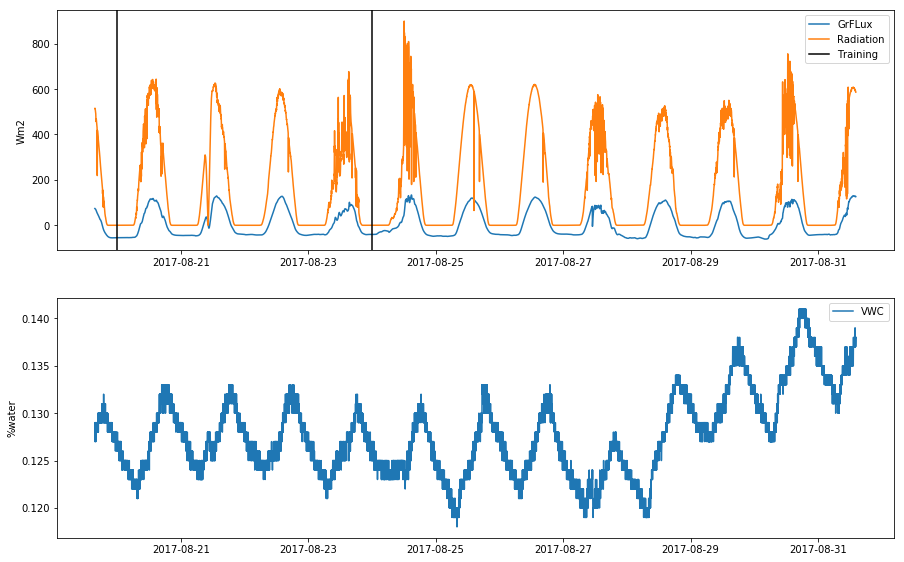

In [4]:
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.plot(data.time,data.GrFlux_Avg, label = 'GrFLux')
plt.plot(data.time,data.ApogeeWm2_Avg, label = 'Radiation')
plt.axvline(x = start, color = 'k', label = 'Training')
plt.axvline(x = end, color = 'k')
plt.ylabel('Wm2')
plt.legend()

plt.subplot(312)
plt.plot(data.time,data.VWC, label = 'VWC')
plt.ylabel('%water')
plt.legend()

## SUPERVISED REGRESSION MODELS

In [5]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(lr.score(X_test, y_test)))

lrtra = lr.score(X_train, np.ravel(y_train))
lrtea = lr.score(X_test, np.ravel(y_test))

Training set score: 0.96
Test set R^2 score: 0.84


In [6]:
ridge = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Ritra = ridge.score(X_train, np.ravel(y_train))
Ritea = ridge.score(X_test, np.ravel(y_test))

Training set score: 0.96
Test set score: 0.94


In [7]:
lasso = Lasso().fit(X_train, y_train)


for C, marker in zip([1, .01, .001], ['o', '^', 'v']):
    lasso = Lasso(alpha=C, max_iter=100000).fit(X_train, np.ravel(y_train))
    print("Training accuracy of l1 logreg with alpha={:.3f}: {:.2f}".format(
          C, lasso.score(X_train, np.ravel(y_train))))
    print("Test accuracy of l1 logreg with alpha={:.3f}: {:.2f}".format(
          C, lasso.score(X_test, np.ravel(y_test))))
 
lasso = Lasso(alpha=1.0, max_iter=100000).fit(X_train, y_train)
latra = lasso.score(X_train, np.ravel(y_train))
latea = lasso.score(X_test, np.ravel(y_test))
print("\nTraining set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training accuracy of l1 logreg with alpha=1.000: 0.95
Test accuracy of l1 logreg with alpha=1.000: 0.95
Training accuracy of l1 logreg with alpha=0.010: 0.96
Test accuracy of l1 logreg with alpha=0.010: 0.93
Training accuracy of l1 logreg with alpha=0.001: 0.96
Test accuracy of l1 logreg with alpha=0.001: 0.88

Training set score: 0.95
Test set score: 0.95
Number of features used: 6


Training set score: 0.96
Test set score: 0.95


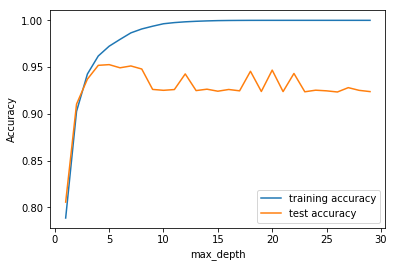

In [8]:
from sklearn.tree import DecisionTreeRegressor
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
max_depth = range(1, 30)

for D in max_depth:
    # build the model
    tree = DecisionTreeRegressor(max_depth = D).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))
    
plt.plot(max_depth, training_accuracy, label="training accuracy")
plt.plot(max_depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

tree = DecisionTreeRegressor(max_depth = 4).fit(X_train, y_train)
#linear_reg = LinearRegression().fit(X_train, y_train)

pred_tree = tree.predict(X_test)
#pred_lr = linear_reg.predict(X_test)

y_pred_tree = pd.DataFrame(list(pred_tree))
y_pred_tree.columns = ['Gpred_tree']

print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

treetra = tree.score(X_train, y_train)
treetea = tree.score(X_test, y_test)

In [9]:
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0).fit(X_train, np.ravel(y_train))

pred_ada = Ada.predict(X_test)
#pred_lr = linear_reg.predict(X_test)

y_pred_ada = pd.DataFrame(list(pred_ada))
y_pred_ada.columns = ['Gpred_ada']

print("Training set score: {:.2f}".format(Ada.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Ada.score(X_test, y_test)))

adatra = Ada.score(X_train, y_train)
adatea = Ada.score(X_test, y_test)

Training set score: 0.98
Test set score: 0.95


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=100).fit(X_train, np.ravel(y_train))
pred_rf = rf.predict(X_test)

print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

y_pred_rf = ridge.predict(X_test)
y_pred_rf = pd.DataFrame(list(y_pred_rf))
y_pred_rf.columns = ['Gpred_rf']

rftra = tree.score(X_train, y_train)
rftea = tree.score(X_test, y_test)

Training set score: 0.97
Test set score: 0.96


## FEATURE IMPORTANCE

Text(0,0.5,'Feature')

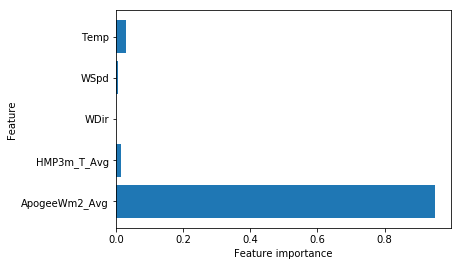

In [11]:
# Evaluate the important features that contribute to salary
important_X = tree.feature_importances_

# Loop through the selected features, if the feature is deemed important (value > 0.01),
# create a new list of important features (Factors) and record their labels(Factor_labels)
Features = X.columns
Factors = []
Factor_labels = []
indice_important = []
for i in range(len(important_X)):
    if important_X[i] > 0.001:
        Factors.append(important_X[i])
        Factor_labels.append(Features[i])
        # column indice of important feature
        indice_important.append(i)
        
# Graphically display the condensed list of the most important features
# in determing a salary greater than 50K.

n_features = Factor_labels
plt.barh(n_features, Factors, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

## REGRESSION MODEL RESULTS

In [102]:
y_pred_lr = lr.predict(X_test)
y_pred_r = ridge.predict(X_test)
y_pred_lr = pd.DataFrame(list(y_pred_lr))
y_pred_lr.columns = ['Gpred_lr']
y_pred_r = pd.DataFrame(list(y_pred_r))
y_pred_r.columns = ['Gpred_r']

data2 = pd.concat([TS, y_pred_lr, y_pred_ada, y_pred_rf, y_pred_tree], axis = 1)
data2 = data2.set_index(['TIMESTAMP'])
data3 = pd.merge(data, data2, left_index =True, right_index = True)

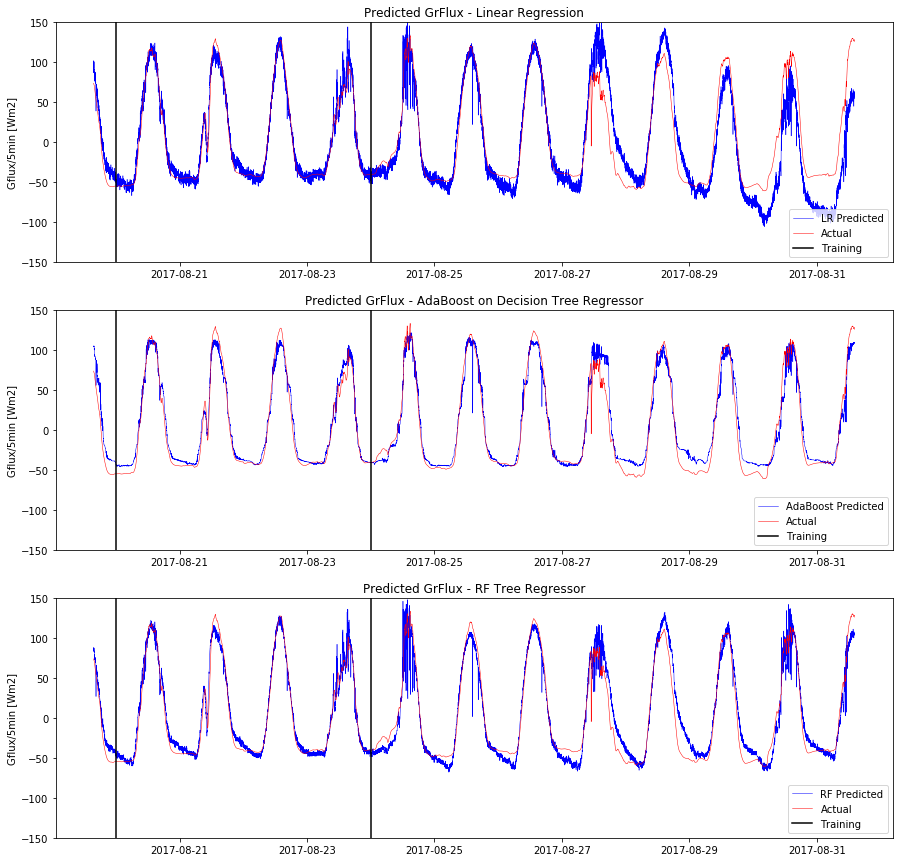

In [13]:
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.title('Predicted GrFlux - Linear Regression')
plt.plot(data.time, data3.Gpred_lr,'b', label = 'LR Predicted', linewidth = 0.5)
plt.plot(data.time, data3.GrFlux_Avg,'r', label = 'Actual', linewidth = 0.5)
plt.axvline(x = start, color = 'k', label = 'Training')
plt.axvline(x = end, color = 'k')
plt.ylim(-150,150)
plt.ylabel('Gflux/5min [Wm2]')
plt.legend(loc = 'lower right')

plt.subplot(312)
plt.title('Predicted GrFlux - AdaBoost on Decision Tree Regressor')
plt.plot(data.time, data3.Gpred_ada,'b', label = 'AdaBoost Predicted', linewidth = 0.5)
plt.plot(data.time, data3.GrFlux_Avg,'r', label = 'Actual', linewidth = 0.5)
plt.axvline(x = start, color = 'k', label = 'Training')
plt.axvline(x = end, color = 'k')
plt.ylim(-150,150)
plt.ylabel('Gflux/5min [Wm2]')
plt.legend(loc = 'lower right')

plt.subplot(313)
plt.title('Predicted GrFlux - RF Tree Regressor')
plt.plot(data3.Gpred_rf,'b', label = 'RF Predicted', linewidth = 0.5)
plt.plot(data3.GrFlux_Avg,'r', label = 'Actual', linewidth = 0.5)
plt.axvline(x = start, color = 'k', label = 'Training')
plt.axvline(x = end, color = 'k')
plt.ylim(-150,150)
plt.ylabel('Gflux/5min [Wm2]')
plt.legend(loc = 'lower right')

In [14]:
LR = [lrtra,lrtea]
Ridge = [Ritra,Ritea]
Lasso = [latra,latea]
Tree = [treetra,treetea]
AdaBoost = [adatra,adatea]
RF = [rftra,rftea]

Train = [lrtra,Ritra,latra,treetra,adatra,rftra]
Test = [lrtea,Ritea,latea,treetea,adatea,rftea]

TB = [LR , Ridge, Lasso, Tree, AdaBoost, RF]
Table = pd.DataFrame({'Train': Train, 'Test': Test}, columns=['Train', 'Test'], 
                     index = ['Lin Reg' , 'Ridge', 'Lasso', 'Tree', 'AdaBoost', 'RF'] )
Table

,Train,Test
Lin Reg,0.963198,0.837408
Ridge,0.956711,0.939914
Lasso,0.948836,0.946253
Tree,0.961914,0.951919
AdaBoost,0.975513,0.951333
RF,0.961914,0.951919


## PART 2: VPD ERROR DATA

In [15]:
file = '/Users/dalynmccauley/Documents/UI FALL18/STATS517/Final Project/DATA/EB_data_12jun-05sep2017.csv'
data = pd.read_csv(file, converters= {'TIMESTAMP': pd.to_datetime})
data = data.fillna(data.mean())
TS = data['TIMESTAMP']
data['time'] = data['TIMESTAMP']
data['TOD'] = data.TIMESTAMP.dt.hour
data = data.set_index(['TIMESTAMP'])
data.head(3)

,Hour,Q7corr,ApogeeWm2,HMP2m_T_Avg,HMP5m_T_Avg,HMP2m_RH_Avg,HMP5m_RH_Avg,WSpd_Avg,P,time,TOD
TIMESTAMP,,,,,,,,,,,
2017-06-12 00:05:00,0:05,-22.475710,-0.277249,12.20,12.36,74.68,71.78,1.450,100.81,2017-06-12 00:05:00,0
2017-06-12 00:10:00,0:10,-19.320563,-0.194077,12.19,12.35,75.29,72.56,1.325,100.81,2017-06-12 00:10:00,0
2017-06-12 00:15:00,0:15,-16.693949,-0.212556,12.11,12.31,75.88,72.71,0.825,100.81,2017-06-12 00:15:00,0
2017-06-12 00:20:00,0:20,-23.740969,-0.277254,12.27,12.45,74.86,71.57,3.450,100.81,2017-06-12 00:20:00,0
2017-06-12 00:25:00,0:25,-30.558422,-0.212564,12.17,12.36,75.98,72.57,3.200,100.81,2017-06-12 00:25:00,0


## DATA PROCESSING

In [16]:
# DEFINE CROP VARIABLES
h = 0.10  # height of vegetation [m]
k = .41  # Von Karmen
z_m = 2  # height of wind meas [m]
z_h = 2  # height of RH meas [m]
d = 2/3 * h  # zero plane displacement [m]
z_om = .123 * h  # roughness length governing momentum transfer [m]
z_oh = .1 * z_om   # roughness length governing heat transfer [m]
C_d = 0.24  # Reference type coefficient for grass with hourly time step - Table 1 ASCE pg. 5[s/m]
C_n = 37  # Reference type coefficient for grass with hourly time step - Table 1 ASCE pg. 5 [K*mm*s^3/Mg*hr]

In [17]:
# DEFINE AIR PROPERTY VARIABLES
LE = 2.45  # Latent heat of evap. for water [MJ/kg]
C_p = 1.013 * 10**(-3)  # C_p of air [MJ/kg*degC]
MW = 0.622  # molecular wieght ratio of water vapor and dry air
R = 0.287  # Universal gas constant [J/kg K]

In [18]:
# Surface Resistance
r_l = 100  # [s/m] Stomatal resistance for short grass
LAI_active = 0.5*h*24  # Active leaf area index for clipped grass [m]
r_s = r_l/(LAI_active)   # [s/m]

In [44]:
# Instantaneous slope of saturation curve delta at 2m air temp (pg. 28 ASCE)
data['air_d'] = data.apply(lambda row: row.P/(R*(1.01*row.HMP2m_T_Avg+273.3)) , axis=1)
data['aero'] = data.apply(lambda row: (np.log((z_m - d)/z_om)*np.log((z_h - d)/z_oh))/(k**2)*row.WSpd_Avg, axis=1)
#data.delta =  2503 * math.exp((17.27*data.HMP2m_T_Avg)/(data.HMP2m_T_Avg + 273.3))/((data.HMP2m_T_Avg+273.3)**2) # [kPa/degC]
data['delta'] = data.apply(lambda row: 2503 * math.exp((17.27*row.HMP2m_T_Avg)/(row.HMP2m_T_Avg + 273.3))/((row.HMP2m_T_Avg+273.3)**2), axis=1)
#Vapor pressure - Temperature equations [kPa]
data['e_0'] = data.apply(lambda row: .6108 * math.exp((17.27*row.HMP2m_T_Avg)/(row.HMP2m_T_Avg + 273.3)), axis=1)
# Actual vapor pressure [kPa]
data['e_a'] = data.apply(lambda row: row.e_0*(row.HMP2m_RH_Avg)/100, axis=1)
# Psychrometric constant gamma [kPa/degC] (ASCE pg.28)
data['gamma'] = data.apply(lambda row: (C_p*row.P)/(MW*LE), axis=1)
# Ground flux
data['Gflux'] = data.apply(lambda row: row.Q7corr*.5, axis=1)
# Vapor Pressure Gradient
data['VPD'] = data.apply(lambda row: (row.e_0 - row.e_a), axis=1)
# If VPG is less than 0.3 flag data
data['VPDError'] = np.where(abs(data['VPD'])<=0.3, 1, 0) 
# Reference ET
data['ETref'] = data.apply(lambda row: ((row.delta*(3600/10**6)*(row.Q7corr-row.Gflux))+(C_p*row.air_d*((row.e_0 - row.e_a)/row.air_d)))/
                        (row.delta + row.gamma*(1+(r_s/row.aero))), axis=1)



,Hour,Q7corr,ApogeeWm2,HMP2m_T_Avg,HMP5m_T_Avg,HMP2m_RH_Avg,HMP5m_RH_Avg,WSpd_Avg,P,time,...,night,sunrise,day,sunset,high_RH,mid_RH,low_RH,high_W,mid_W,low_W
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-06-12 00:05:00,0:05,-22.475710,-0.277249,12.20,12.36,74.68,71.78,1.450,100.81,2017-06-12 00:05:00,...,1,0,0,0,0,0,1,1,0,0
2017-06-12 00:10:00,0:10,-19.320563,-0.194077,12.19,12.35,75.29,72.56,1.325,100.81,2017-06-12 00:10:00,...,1,0,0,0,0,0,1,1,0,0
2017-06-12 00:15:00,0:15,-16.693949,-0.212556,12.11,12.31,75.88,72.71,0.825,100.81,2017-06-12 00:15:00,...,1,0,0,0,0,0,1,1,0,0


In [57]:
# ADD CATEGORICAL VARIABLES FOR TIME OF DAY
data['night'] = np.where((data['TOD'] <=5) | (data['TOD'] >21), 1, 0)
data['sunrise'] = np.where((data['TOD'] >5) & (data['TOD'] <= 8), 1, 0)
data['day'] = np.where((data['TOD'] >8) & (data['TOD'] <= 19), 1, 0)
data['sunset'] = np.where((data['TOD'] >19) & (data['TOD'] <=21), 1, 0)

data['high_T'] = np.where((data['HMP2m_T_Avg'] >=25), 1, 0)
data['mid_T'] = np.where((data['HMP2m_T_Avg'] < 25 ) & (data['HMP2m_T_Avg'] >= 15), 1, 0)
data['low_T'] = np.where((data['HMP2m_T_Avg'] < 15), 1, 0)

data['high_RH'] = np.where((data['HMP2m_RH_Avg'] >=90), 1, 0)
data['mid_RH'] = np.where((data['HMP2m_RH_Avg'] < 90 ) & (data['HMP2m_RH_Avg'] >= 35), 1, 0)
data['low_RH'] = np.where((data['HMP2m_RH_Avg'] < 35), 1, 0)

data['high_W'] = np.where((data['WSpd_Avg'] >=5), 1, 0)
data['mid_W'] = np.where((data['WSpd_Avg'] < 5 ) & (data['WSpd_Avg'] >= 3), 1, 0)
data['low_W'] = np.where((data['WSpd_Avg'] < 3), 1, 0)

#print(data['day'].value_counts())
#print(data['night'].value_counts())
#print(data['sunset'].value_counts())
#print(data['sunrise'].value_counts())

# NEW DATASET WITH COMPUTED VALUES OF VPD ERROR AND ETREF
data.head(3)

,Hour,Q7corr,ApogeeWm2,HMP2m_T_Avg,HMP5m_T_Avg,HMP2m_RH_Avg,HMP5m_RH_Avg,WSpd_Avg,P,time,...,sunset,high_RH,mid_RH,low_RH,high_W,mid_W,low_W,high_T,mid_T,low_T
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-06-12 00:05:00,0:05,-22.475710,-0.277249,12.20,12.36,74.68,71.78,1.450,100.81,2017-06-12 00:05:00,...,0,0,1,0,0,0,1,0,0,1
2017-06-12 00:10:00,0:10,-19.320563,-0.194077,12.19,12.35,75.29,72.56,1.325,100.81,2017-06-12 00:10:00,...,0,0,1,0,0,0,1,0,0,1
2017-06-12 00:15:00,0:15,-16.693949,-0.212556,12.11,12.31,75.88,72.71,0.825,100.81,2017-06-12 00:15:00,...,0,0,1,0,0,0,1,0,0,1


## DATA VISUALIZATION

Text(0,0.5,'Pressure [kPa]')

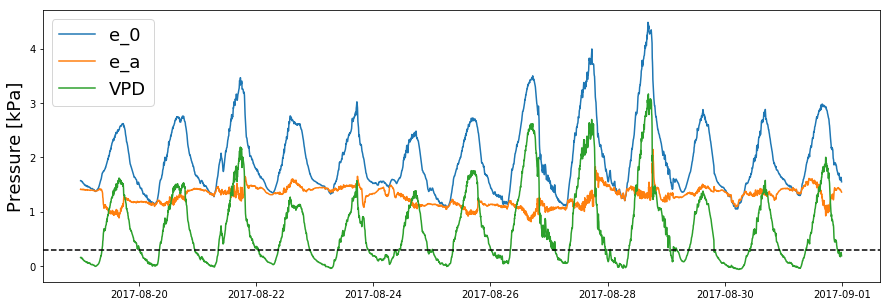

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.e_0.loc['2017-8-19':'2017-8-31'])
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.e_a.loc['2017-8-19':'2017-8-31'])
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.VPD.loc['2017-8-19':'2017-8-31'])
plt.axhline(y = 0.3, color = 'k', linestyle = '--')
plt.legend(fontsize = 18)
plt.ylabel('Pressure [kPa]', fontsize =18)

Text(0.5,1,'Relative Humidity')

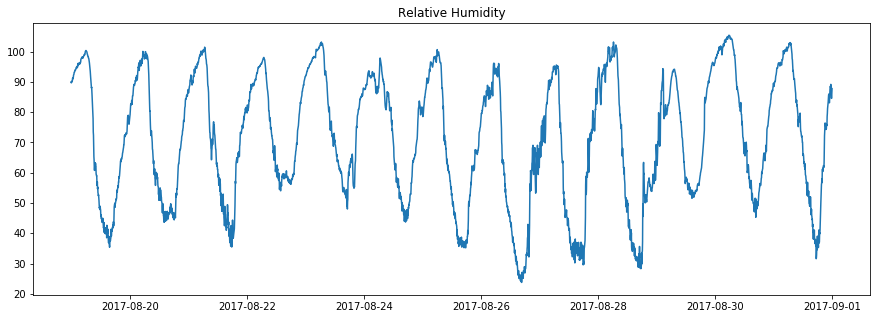

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.HMP2m_RH_Avg.loc['2017-8-19':'2017-8-31'])
plt.title('Relative Humidity')

Text(0.5,1,'Wind Speed')

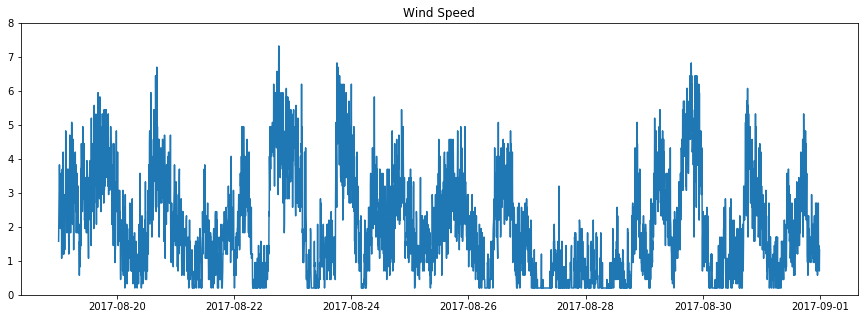

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.WSpd_Avg.loc['2017-8-19':'2017-8-31'])
plt.ylim(0,8)
plt.title('Wind Speed')

Text(0.5,1,'Temperature (C)')

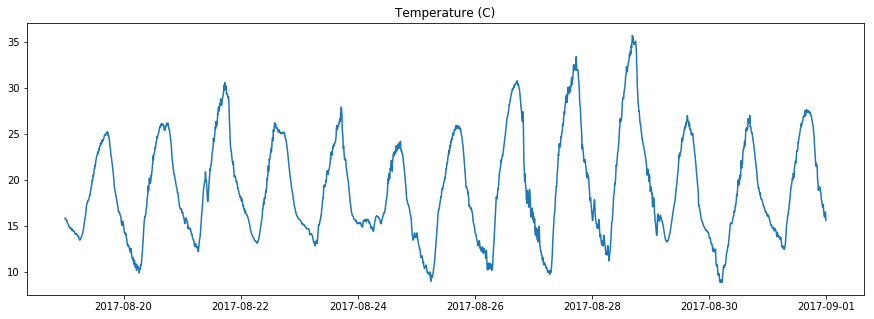

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(data.time.loc['2017-8-19':'2017-8-31'],data.HMP2m_T_Avg.loc['2017-8-19':'2017-8-31'])
plt.title('Temperature (C)')

## CLUSTERING

In [22]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

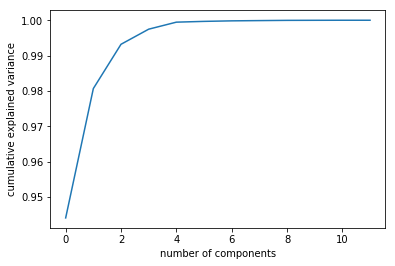

In [28]:
# DROP TARGET VARIABLE AND CALCULATED VARUABLES FOR CLUSTERING ANALYSIS
X_error = data.drop(['air_d', 'aero', 'delta',
       'e_0', 'e_a', 'gamma', 'Gflux', 'VPD', 'VPDError','Hour' ,'time', 'Q7corr', 'ApogeeWm2'], axis = 1)

from sklearn.decomposition import PCA
X_mito = X_error
pca = PCA().fit(X_mito)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
X_error.head(3)

In [30]:
## Principal Component Analysis
# keep the first n principal components of the data
pca = PCA(n_components=3)
# fit PCA model to data
pca.fit(X_error)

# transform data onto the first two principal components
X_pca = pca.transform(X_error)
print("Original shape: {}".format(X_error.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (24585, 12)
Reduced shape: (24585, 3)


Text(0,0.5,'PC2')

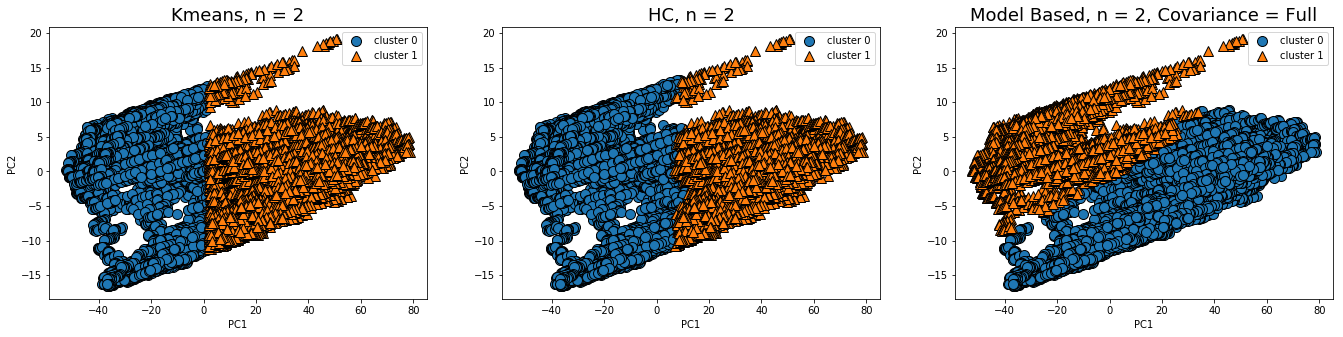

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(23,5))

n = 2
# Kmeans:
kmeans = KMeans(n_clusters=n)
kmeans.fit(X_pca)
KMlabels = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], KMlabels, ax=axes[0])
ax = axes[0]
ax.legend(["cluster 0", "cluster 1", "cluster 2"], 
          loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Kmeans, n = 2', fontsize = 18)
ax.set_ylabel('PC2')

# Hierarchal:
HC = AgglomerativeClustering(n_clusters=n).fit(X_pca)
HClabels = HC.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], HClabels, ax=axes[1])
ax = axes[1]
ax.legend(["cluster 0", "cluster 1", "cluster 2"],
          loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('HC, n = 2', fontsize = 18)
ax.set_ylabel('PC2')

# Model Based:
gmm = GaussianMixture(n_components=n, covariance_type='full').fit(X_pca)
GMlabels =gmm.predict(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], GMlabels, ax=axes[2])
ax = axes[2]
ax.legend(["cluster 0", "cluster 1", "cluster 2"], loc='upper right')
ax.set_xlabel('PC1')
ax.set_title('Model Based, n = 2, Covariance = Full', fontsize = 18)
ax.set_ylabel('PC2')

In [32]:
KMflag =pd.DataFrame(KMlabels, columns =['KM'])
HCflag =pd.DataFrame(HClabels, columns =['HC'])
GMflag =pd.DataFrame(GMlabels, columns =['GM'])

trans = pd.concat([TS, KMflag, HCflag,GMflag], axis = 1)
trans = trans.set_index(['TIMESTAMP'])
data4 = pd.merge(data, trans, left_index =True, right_index = True)
data4.head()

print('Kmeans {:}'.format(normalized_mutual_info_score(data4.VPDError, data4.KM)))
print('HC {:}'.format(normalized_mutual_info_score(data4.VPDError, data4.HC)))
print('GMM {:}'.format(normalized_mutual_info_score(data4.VPDError, data4.GM)))

Kmeans 0.47111455403777136
HC 0.3662264925635367
GMM 0.3159998838623059


In [33]:
pd.crosstab(data4.VPDError,data4.KM,margins=True)

KM,0,1,All
VPDError,,,
0,4278,11396,15674
1,8911,0,8911
All,13189,11396,24585


In [34]:
pd.crosstab(data4.VPDError,data4.HC,margins=True)

HC,0,1,All
VPDError,,,
0,6102,9572,15674
1,8911,0,8911
All,15013,9572,24585


In [103]:
pd.crosstab(data4.VPDError,data4.GM,margins=True)

GM,0,1,All
VPDError,,,
0,12103,3571,15674
1,1104,7807,8911
All,13207,11378,24585


## ASSOCIATION

In [101]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#from apyori import apriori  

data5 = data.drop(['Hour', 'Q7corr', 'ApogeeWm2', 'HMP2m_T_Avg', 'HMP5m_T_Avg',
       'HMP2m_RH_Avg', 'HMP5m_RH_Avg', 'WSpd_Avg', 'P', 'time', 'TOD', 'air_d',
       'aero', 'delta', 'e_0', 'e_a', 'gamma', 'Gflux', 'VPD',
       'ETref'],axis = 1)
data5.head()

rules = apriori(data5, min_support=0.1, use_colnames=True)## Add imputed variables of other predictors
rules['length'] = rules['itemsets'].apply(lambda x: len(x))
rules[ (rules['length'] > 1)].sort_values(by=['support'], ascending=False).head(20)

,support,itemsets,length
34,0.464999,"(mid_RH, mid_T)",2
32,0.446695,"(low_W, mid_RH)",2
24,0.400122,"(mid_RH, day)",2
37,0.304983,"(low_W, mid_T)",2
59,0.271385,"(low_W, mid_RH, mid_T)",3
15,0.268904,"(low_W, VPDError)",2
28,0.265202,"(mid_T, day)",2
26,0.260199,"(low_W, day)",2
17,0.259630,"(low_T, VPDError)",2
55,0.254952,"(mid_T, mid_RH, day)",3
